In [1]:
import pymysql

import pandas as pd
from collections import Counter

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [2]:
conn = pymysql.connect(host='localhost', user='root', password='1234', db='happy_dogourmet', charset='utf8')
containMat = pd.read_sql('SELECT * FROM containmat', con=conn)

In [3]:
containMat

,name,DL-메티오닌,L-라이신,L-카르니틴,결명자,계란,고구마,구연산,콩류,글루코사민,...,표고버섯,프로테아제,피망,해바라기씨,현미,호박,호박씨,홍삼,효모,흰살생선
0,ECO 1 램,1,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,ECO 10 베지테리언,1,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,ECO 2 덕,1,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
3,ECO 3a 센시케어(램),0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4,ECO 3b 센시케어(터키),0,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,"프롬벳 사료, 피부에 좋은 사료 2.2kg",0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
484,하이도그,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
485,홀리스틱 그레인프리 연어와 병아리콩,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
486,홀리스틱 그레인프리 치킨과 감자,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# - kmeans

### 1. k개수 정하기(elbow기법)

In [4]:
elbow = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(containMat.loc[:,'DL-메티오닌':'흰살생선'].values)
    elbow.append(kmeans.inertia_)

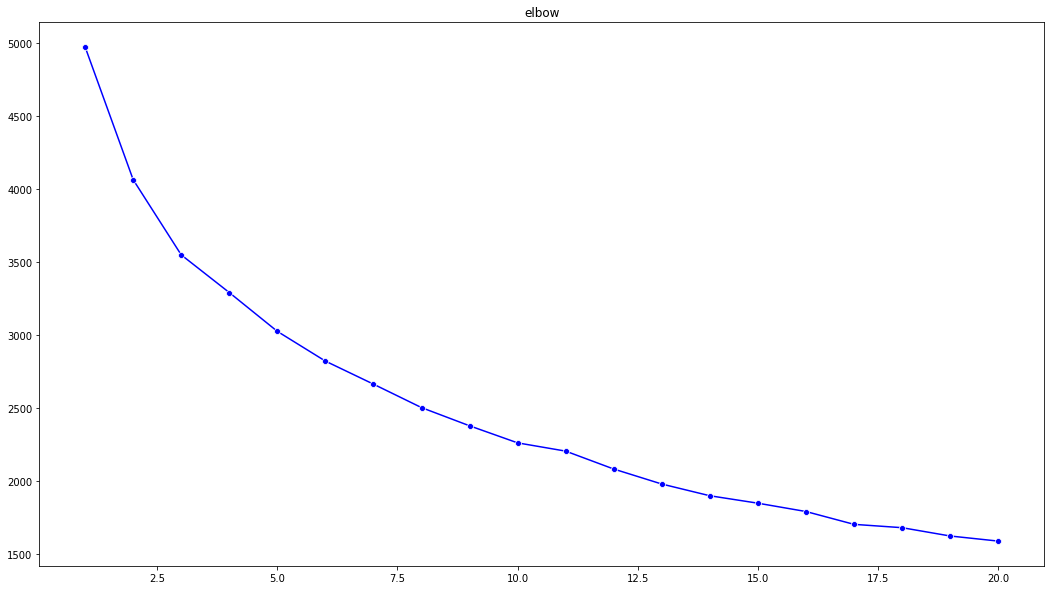

In [5]:
plt.subplots(figsize=(18,10))
sns.lineplot(range(1,21), elbow, color='b', marker='o')
plt.title('elbow')
plt.show()

### 1-1. k개수 정하기(hclust)

In [6]:
mergings = linkage(containMat.loc[:,'DL-메티오닌':'흰살생선'].values, method='complete')

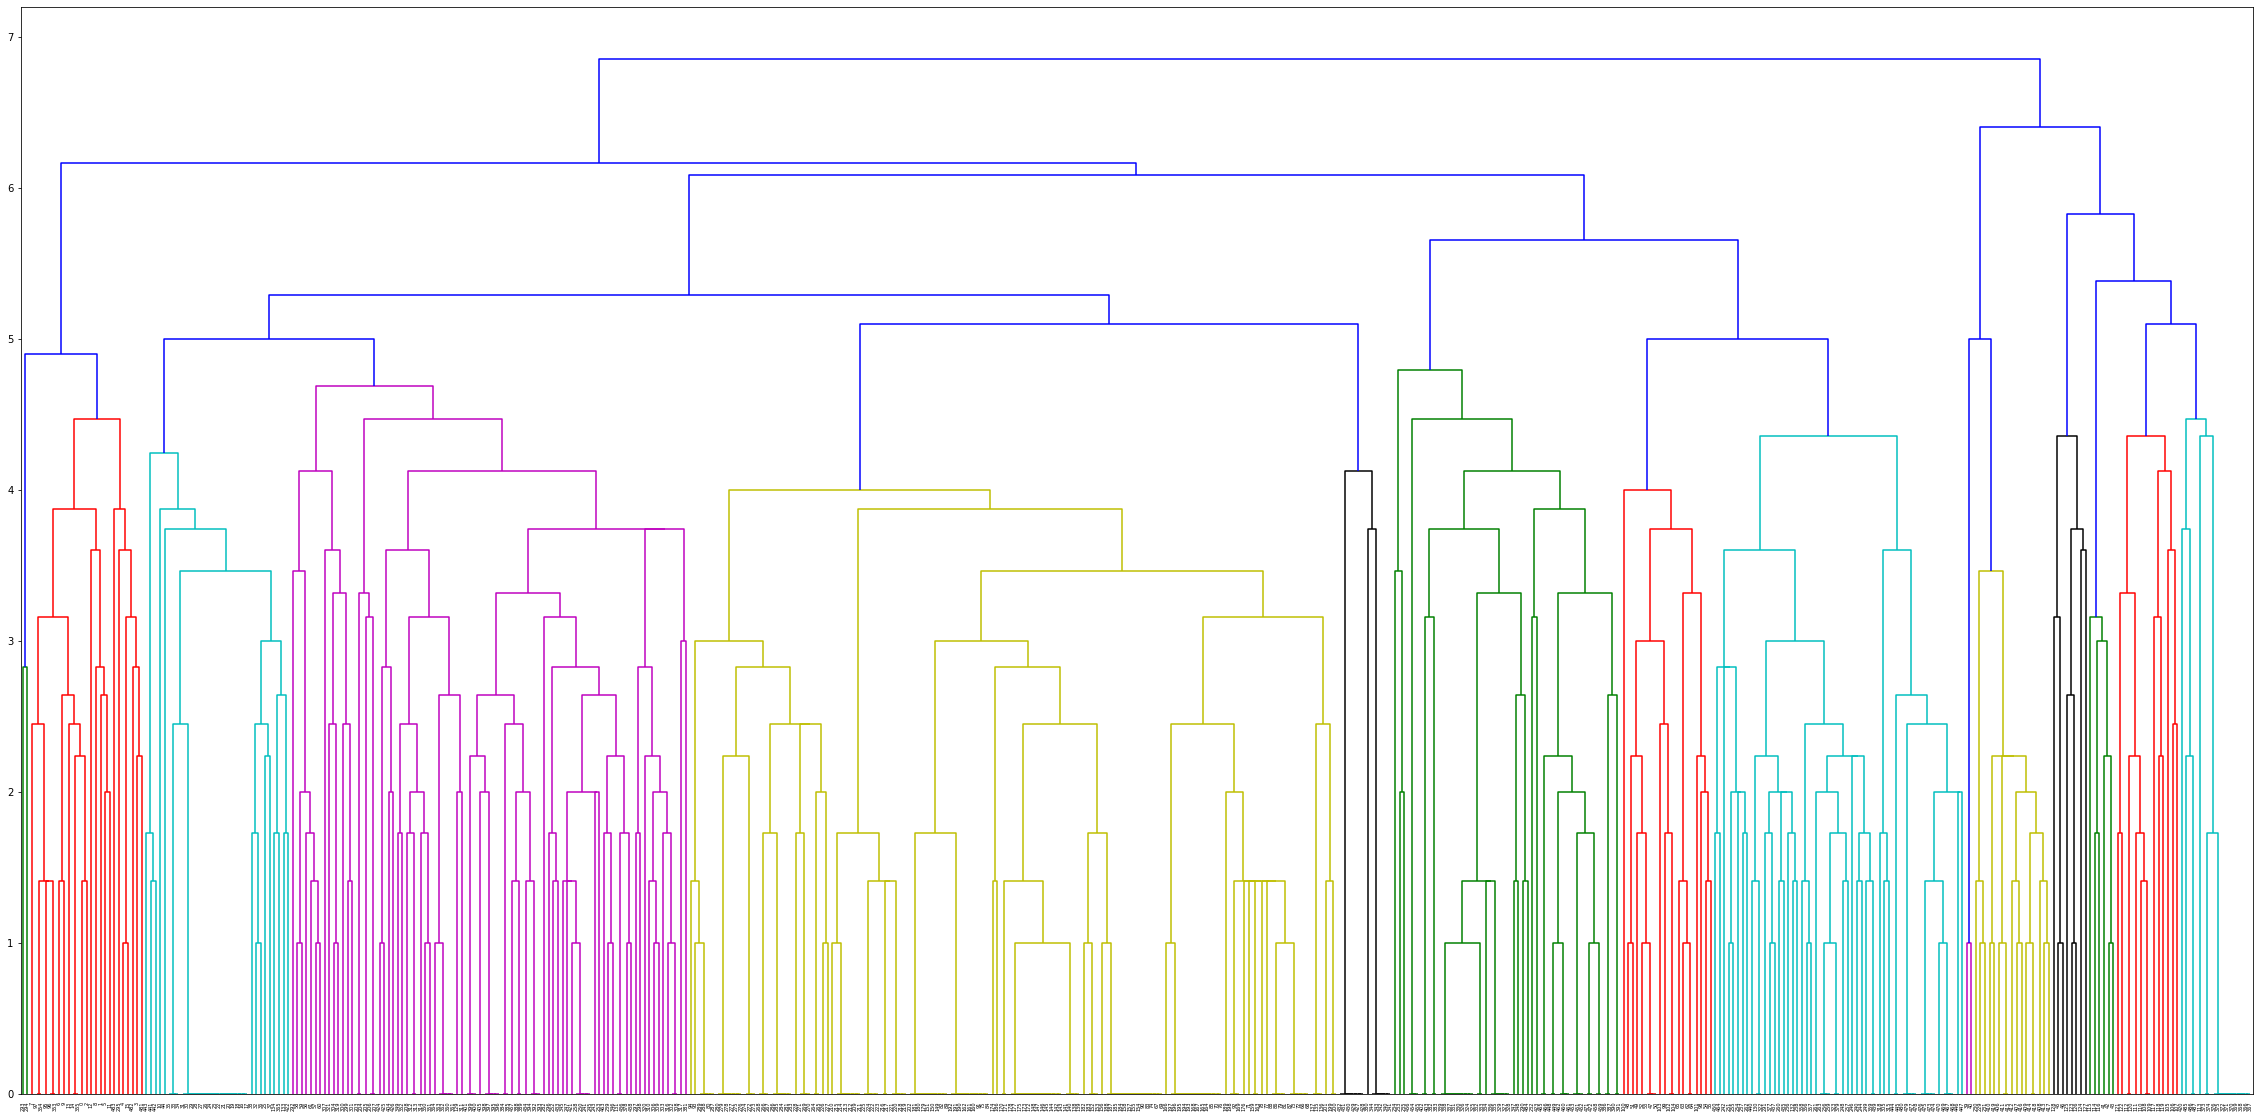

In [7]:
plt.figure(figsize=(40,20))
dendrogram(mergings)
plt.show()

In [14]:
predict = pd.DataFrame(fcluster(mergings,5,criterion='distance'))
predict.columns=['predict']

In [15]:
cut = Counter(predict['predict'])

In [16]:
pd.DataFrame(sorted(cut.items(), key=lambda pair: pair[0], reverse=False), columns=['cluster','count'])

,cluster,count
0,1,27
1,2,119
2,3,142
3,4,12
4,5,50
5,6,75
6,7,19
7,8,8
8,9,6
9,10,14


### 2. 알고리즘

In [17]:
Kmeans = KMeans(n_clusters=10, init='k-means++', random_state=0).fit(containMat.loc[:,'DL-메티오닌':'흰살생선'].values)

In [18]:
Kmeans.labels_

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 3, 3, 4, 4, 4,
       5, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       1, 9, 1, 9, 9, 1, 1, 1, 9, 9, 9, 1, 1, 1, 1, 1, 9, 9, 9, 9, 1, 1,
       1, 9, 9, 9, 1, 1, 1, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7,
       7, 7, 7, 4, 4, 4, 4, 7, 4, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 5, 2, 5,
       2, 5, 5, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 1, 9, 9, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9,
       1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9,
       1, 1, 1, 1, 9, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 7, 7, 7, 7, 2, 2, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 2, 5, 2, 5, 5, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       1, 1, 1, 1, 7, 2, 5, 5, 5, 8, 5, 5, 5, 5, 5,

In [19]:
clusterCount = Counter(Kmeans.labels_)

In [20]:
pd.DataFrame(sorted(clusterCount.items(), key=lambda pair: pair[0], reverse=False), columns=['cluster','count'])

,cluster,count
0,0,31
1,1,73
2,2,34
3,3,19
4,4,31
5,5,122
6,6,20
7,7,63
8,8,26
9,9,69


### 3. 사료 데이터 군집별 분석

In [21]:
cluster = pd.DataFrame(Kmeans.labels_, columns=['labels'])

In [22]:
result = pd.concat([containMat, cluster], axis=1)

In [23]:
clust0 = result.groupby('labels').get_group(0)
clust0_ = pd.DataFrame(clust0.sum()).T
clust0_.to_csv('kmeans_result.csv', mode='w', encoding='utf-8-sig')

In [24]:
clust1 = result.groupby('labels').get_group(1)
clust1_ = pd.DataFrame(clust1.sum()).T
clust1_.to_csv('kmeans_result.csv', mode='a', header=False)

In [25]:
clust2 = result.groupby('labels').get_group(2)
clust2_ = pd.DataFrame(clust2.sum()).T
clust2_.to_csv('kmeans_result.csv', mode='a', header=False)

In [26]:
clust3 = result.groupby('labels').get_group(3)
clust3_ = pd.DataFrame(clust3.sum()).T
clust3_.to_csv('kmeans_result.csv', mode='a', header=False)

In [27]:
clust4 = result.groupby('labels').get_group(4)
clust4_ = pd.DataFrame(clust4.sum()).T
clust4_.to_csv('kmeans_result.csv', mode='a', header=False)

In [28]:
clust5 = result.groupby('labels').get_group(5)
clust5_ = pd.DataFrame(clust5.sum()).T
clust5_.to_csv('kmeans_result.csv', mode='a', header=False)

In [29]:
clust6 = result.groupby('labels').get_group(6)
clust6_ = pd.DataFrame(clust6.sum()).T
clust6_.to_csv('kmeans_result.csv', mode='a', header=False)

In [30]:
clust7 = result.groupby('labels').get_group(7)
clust7_ = pd.DataFrame(clust7.sum()).T
clust7_.to_csv('kmeans_result.csv', mode='a', header=False)

In [31]:
clust8 = result.groupby('labels').get_group(8)
clust8_ = pd.DataFrame(clust8.sum()).T
clust8_.to_csv('kmeans_result.csv', mode='a', header=False)

In [32]:
clust9 = result.groupby('labels').get_group(9)
clust9_ = pd.DataFrame(clust9.sum()).T
clust9_.to_csv('kmeans_result.csv', mode='a', header=False)

#### - 결과
- 대부분의 사료에 포함된 성분, 하나의 사료에만 포함된 성분은 군집을 나누는 데 영향이 없을 것으로 판단
- 사료의 영양분에 영향을 미치지 않는 성분 제거
- 4개 이하의 브랜드에서만 사용되는 성분 제거
- => 성분을 줄여 다시 군집분석 실시

# - kmeans2

### 0. 일부 성분 열 제거

In [ ]:
# '강황','결명자','구연산','금잔화','녹색입홍합','단호박','동물성단백질','들깨','루테인','마늘','망고','메밀','미나리','미네랄','미세조류','민들레','바나나','바실러스균','베타글루칸','베타카로틴','비오틴','비타민B','비트','사슴','사탕수수','생강','숙지황','씨벅턴','알팔파','양배추','오메가','우유','유청','이소말토올리고당','차전자피','차카테킨','참깨','참치','천궁','초유','치아씨','커큐민','케일','켈프','퀴노아','크릴새우','키토산','파파야','표고버섯','프로테아제','피망','해바라기씨','호박씨','홍삼'

In [58]:
containMat2 = containMat.drop(['강황','결명자','구연산','금잔화','녹색입홍합','단호박','동물성단백질','들깨','루테인','마늘','망고','메밀','미나리','미네랄','미세조류','민들레','바나나','바실러스균','베타글루칸','베타카로틴','비오틴','비타민B','비트','사슴','사탕수수','생강','숙지황','씨벅턴','알팔파','양배추','오메가','우유','유청','이소말토올리고당','차전자피','차카테킨','참깨','참치','천궁','초유','치아씨','커큐민','케일','켈프','퀴노아','크릴새우','키토산','파파야','표고버섯','프로테아제','피망','해바라기씨','호박씨','홍삼'], axis=1)
containMat2

,name,DL-메티오닌,L-라이신,L-카르니틴,계란,고구마,콩류,글루코사민,다시마,닭,...,코코넛오일,콘드로이틴,타우린,타피오카,토마토,파슬리,현미,호박,효모,흰살생선
0,ECO 1 램,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,ECO 10 베지테리언,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,ECO 2 덕,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,ECO 3a 센시케어(램),0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,ECO 3b 센시케어(터키),0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,"프롬벳 사료, 피부에 좋은 사료 2.2kg",0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
484,하이도그,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
485,홀리스틱 그레인프리 연어와 병아리콩,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
486,홀리스틱 그레인프리 치킨과 감자,0,0,0,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0


### 1. k개수 정하기(elbow기법)

In [59]:
elbow2 = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(containMat2.loc[:,'DL-메티오닌':'흰살생선'].values)
    elbow2.append(kmeans.inertia_)

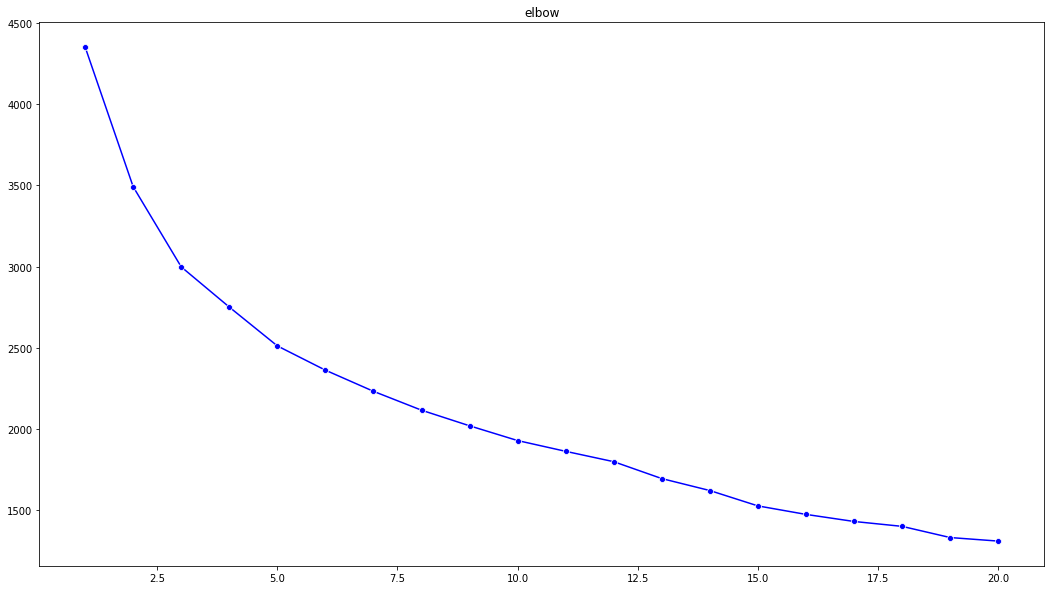

In [60]:
plt.subplots(figsize=(18,10))
sns.lineplot(range(1,21), elbow2, color='b', marker='o')
plt.title('elbow')
plt.show()

### 1-1. k개수 정하기(hclust)

In [61]:
mergings2 = linkage(containMat2.loc[:,'DL-메티오닌':'흰살생선'].values, method='complete')

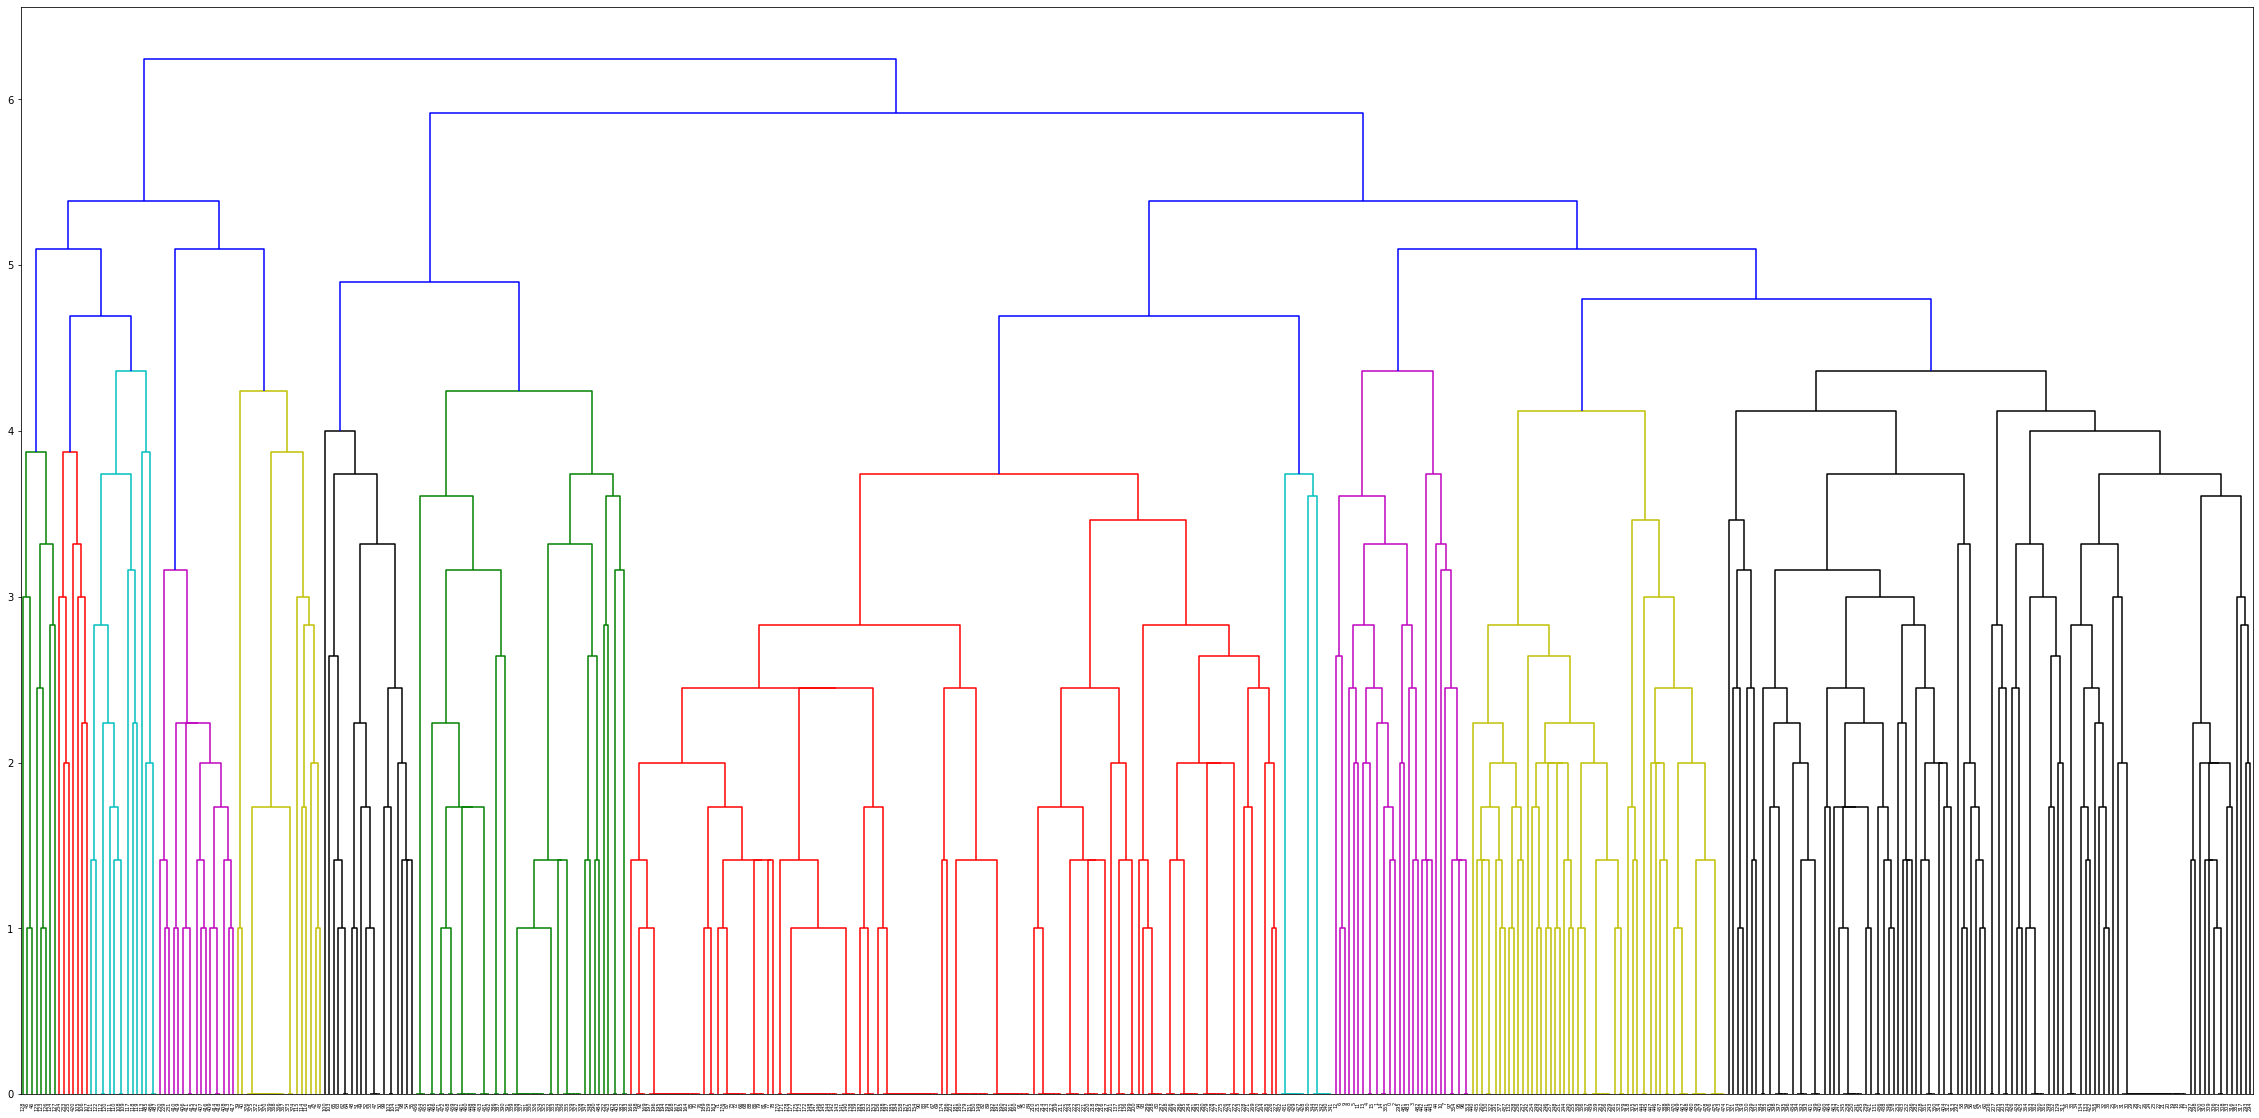

In [62]:
plt.figure(figsize=(40,20))
dendrogram(mergings2)
plt.show()

In [69]:
predict2 = pd.DataFrame(fcluster(mergings2,5,criterion='distance'))
predict2.columns=['predict']

cut2 = Counter(predict2['predict'])

In [70]:
pd.DataFrame(sorted(cut2.items(), key=lambda pair: pair[0], reverse=False), columns=['cluster','count'])

,cluster,count
0,1,8
1,2,22
2,3,17
3,4,19
4,5,67
5,6,154
6,7,30
7,8,171


### 2. 알고리즘

In [71]:
Kmeans2 = KMeans(n_clusters=8, init='k-means++', random_state=0).fit(containMat2.loc[:,'DL-메티오닌':'흰살생선'].values)

In [72]:
Kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 3, 3, 7, 7, 7,
       0, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 1, 1, 0, 0, 0, 4, 4, 5, 4, 4, 4, 4, 5, 5, 7, 5, 5,
       5, 5, 5, 7, 7, 7, 7, 5, 7, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 2, 4, 2,
       4, 2, 2, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 1, 1, 1, 6, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 7, 5, 5, 4, 4, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 5, 4, 2, 0, 2, 0, 2, 2, 2, 0, 0,

In [73]:
clusterCount2 = Counter(Kmeans2.labels_)

In [74]:
pd.DataFrame(sorted(clusterCount2.items(), key=lambda pair: pair[0], reverse=False), columns=['cluster','count'])

,cluster,count
0,0,70
1,1,54
2,2,109
3,3,19
4,4,53
5,5,62
6,6,88
7,7,33


### 3. 사료 데이터 군집별 분석

In [75]:
cluster2 = pd.DataFrame(Kmeans2.labels_, columns=['labels'])

result2 = pd.concat([containMat2, cluster2], axis=1)

clust0 = result2.groupby('labels').get_group(0)
clust0_ = pd.DataFrame(clust0.sum()).T
clust0_.to_csv('kmeans_result2.csv', mode='w', encoding='utf-8-sig')

clust1 = result2.groupby('labels').get_group(1)
clust1_ = pd.DataFrame(clust1.sum()).T
clust1_.to_csv('kmeans_result2.csv', mode='a', header=False)

clust2 = result2.groupby('labels').get_group(2)
clust2_ = pd.DataFrame(clust2.sum()).T
clust2_.to_csv('kmeans_result2.csv', mode='a', header=False)

clust3 = result2.groupby('labels').get_group(3)
clust3_ = pd.DataFrame(clust3.sum()).T
clust3_.to_csv('kmeans_result2.csv', mode='a', header=False)

clust4 = result2.groupby('labels').get_group(4)
clust4_ = pd.DataFrame(clust4.sum()).T
clust4_.to_csv('kmeans_result2.csv', mode='a', header=False)

clust5 = result2.groupby('labels').get_group(5)
clust5_ = pd.DataFrame(clust5.sum()).T
clust5_.to_csv('kmeans_result2.csv', mode='a', header=False)

clust6 = result2.groupby('labels').get_group(6)
clust6_ = pd.DataFrame(clust6.sum()).T
clust6_.to_csv('kmeans_result2.csv', mode='a', header=False)

clust7 = result2.groupby('labels').get_group(7)
clust7_ = pd.DataFrame(clust7.sum()).T
clust7_.to_csv('kmeans_result2.csv', mode='a', header=False)

#### - 결과
- 브랜드별로 사용하는 원료가 달라 군집 결과도 브랜드별로 출력
- 주요 원료를 기준으로 컬럼을 구성한 후 군집

# - kmeans3

### - 질병
- 눈 : 당근, 베리류, 시금치, 생선, 계란, 비타민A, 루테인
- 피부, 모질 : 비타민B7, 비타민B5, 비타민B2, 생선, 코코넛오일, 식물성단백질, 동물성단백질
- 체중관리 : L-카르니틴
- 장(변) : 콩류, 사과, 섬유소, 유산균, 이눌린
- 면역력 : 비타민C, 타우린, 효모
- 소화 : 양배추
- 관절 : 녹색입홍합, 글루코사민, 콘드로이틴
- 심장 : 커큐민
- 신장 : 비타민B6
- 뼈(치아) : 비타민D, 토마토

### 0. 일부 성분 열 제거

In [ ]:
# '당근','베리류','시금치','생선','계란','결명자','비타민A','루테인','비타민B7','비타민B7','비타민B5','비타민B2','생선','코코넛오일','켈프','식물성단백질','동물성단백질','L-카르니틴','차카테킨','홍삼','메밀','콩류','사과','섬유소','유산균','이눌린','비타민C','씨벅턴','타우린','효모','양배추','녹색입홍합','글루코사민','콘드로이틴','커큐민','구연산','비타민B6','비타민D','토마토'

In [3]:
containMat3 = containMat[['name','당근','베리류','시금치','생선','계란','비타민A','루테인','비타민B7','비타민B7','비타민B5','비타민B2','생선','코코넛오일','식물성단백질','동물성단백질','L-카르니틴','콩류','사과','섬유소','유산균','이눌린','비타민C','타우린','효모','양배추','녹색입홍합','글루코사민','콘드로이틴','커큐민','비타민B6','비타민D','토마토']]
containMat3

,name,당근,베리류,시금치,생선,계란,비타민A,루테인,비타민B7,비타민B7,...,타우린,효모,양배추,녹색입홍합,글루코사민,콘드로이틴,커큐민,비타민B6,비타민D,토마토
0,ECO 1 램,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ECO 10 베지테리언,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ECO 2 덕,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ECO 3a 센시케어(램),1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ECO 3b 센시케어(터키),1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,"프롬벳 사료, 피부에 좋은 사료 2.2kg",1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,하이도그,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
485,홀리스틱 그레인프리 연어와 병아리콩,1,1,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
486,홀리스틱 그레인프리 치킨과 감자,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1


### 1. k개수 정하기(elbow기법)

In [4]:
elbow3 = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(containMat3.loc[:,'당근':'토마토'].values)
    elbow3.append(kmeans.inertia_)

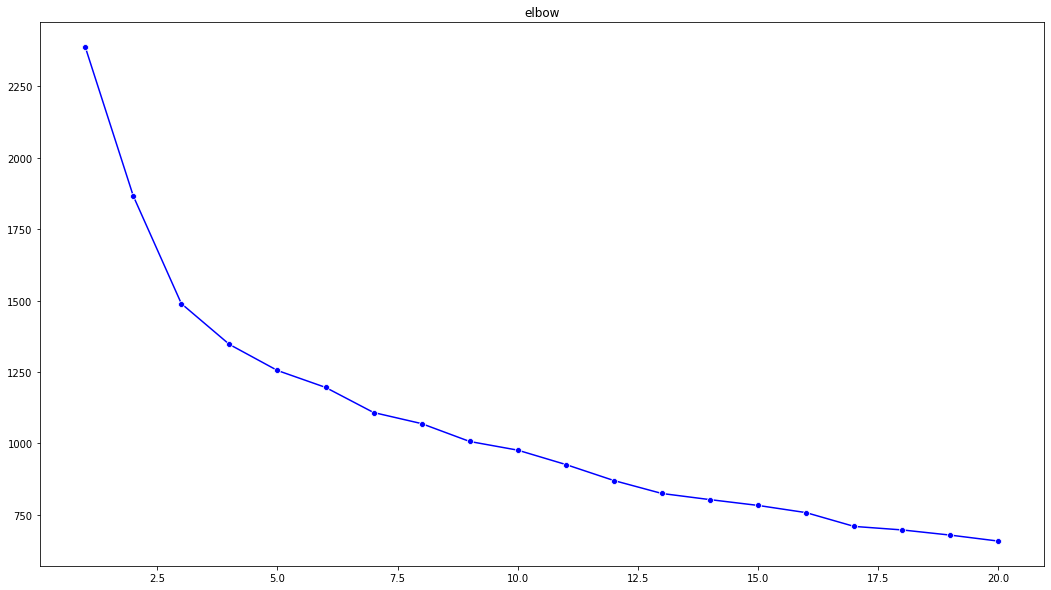

In [5]:
plt.subplots(figsize=(18,10))
sns.lineplot(range(1,21), elbow3, color='b', marker='o')
plt.title('elbow')
plt.show()

### 1-1. k개수 정하기(hclust)

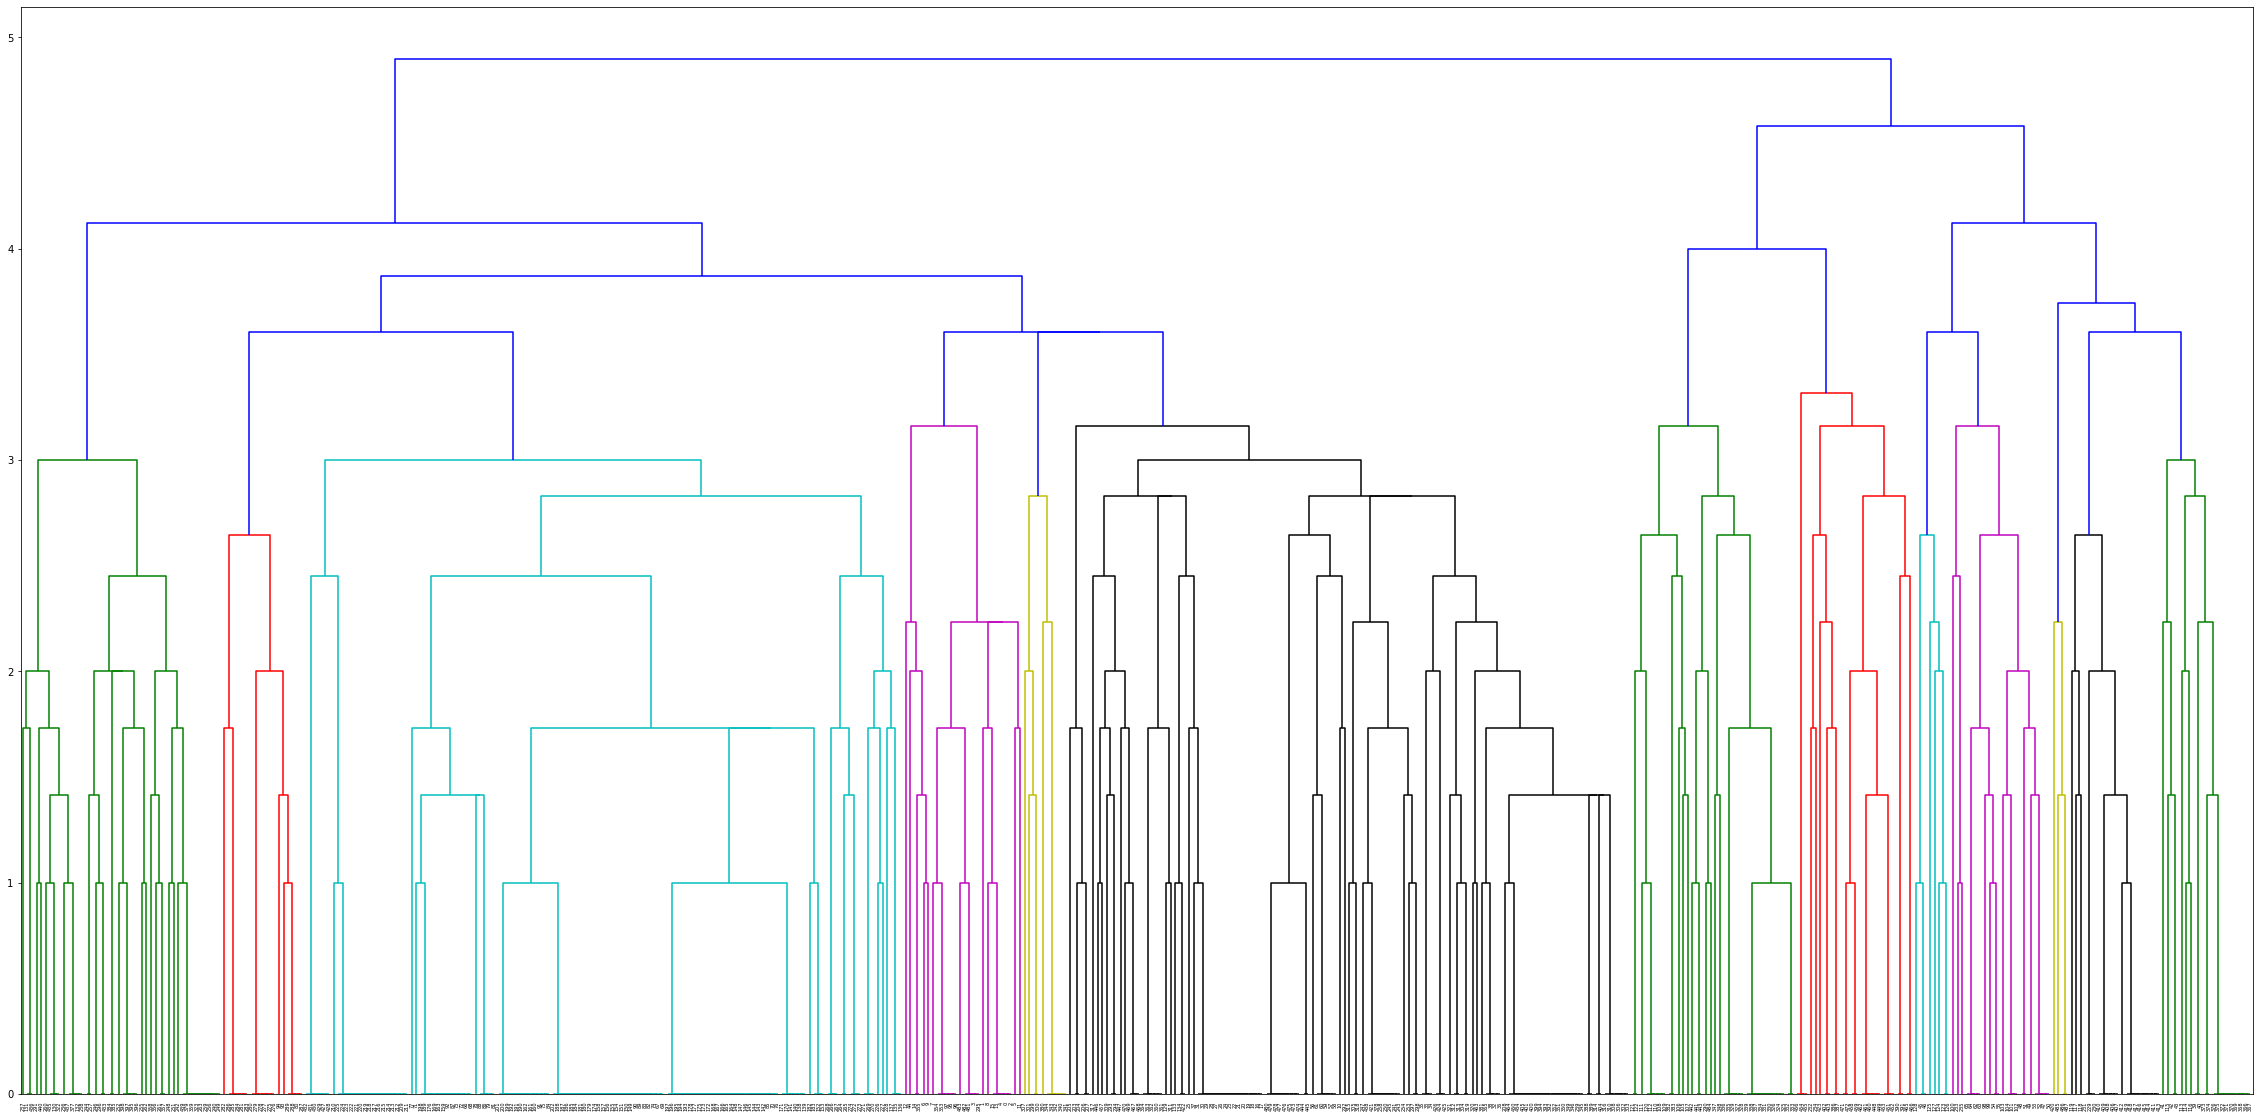

In [6]:
mergings3 = linkage(containMat3.loc[:,'당근':'토마토'].values, method='complete')

plt.figure(figsize=(40,20))
dendrogram(mergings3)
plt.show()

In [7]:
predict3 = pd.DataFrame(fcluster(mergings3,3.2,criterion='distance'))
predict3.columns=['predict']

cut3 = Counter(predict3['predict'])
pd.DataFrame(sorted(cut3.items(), key=lambda pair: pair[0], reverse=False), columns=['cluster','count'])

,cluster,count
0,1,44
1,2,18
2,3,131
3,4,26
4,5,10
5,6,123
6,7,36
7,8,3
8,9,23
9,10,8


### 2. 알고리즘

In [8]:
Kmeans3 = KMeans(n_clusters=14, init='k-means++', random_state=0).fit(containMat3.loc[:,'당근':'토마토'].values)
Kmeans3.labels_

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 10,  7,  7,  7,  7,  7,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 10,  6,
        6,  6, 10,  6, 10, 13, 13,  3,  3,  3, 10,  9,  9, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  2,  2,  2,  5,  5,  5,
        5,  2,  5,  2,  5,  5,  5,  5,  2,  2,  7,  7,  7, 12, 12, 12, 12,
       12, 12, 12, 12,  4, 12, 12, 12, 12, 12, 12,  3,  3,  3,  3,  4,  4,
        4, 12, 12, 12,  9,  9,  9,  9,  9,  9,  7,  0, 10,  0, 10, 10,  2,
        2,  2,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 10,
       10,  7, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [9]:
clusterCount3 = Counter(Kmeans3.labels_)
pd.DataFrame(sorted(clusterCount3.items(), key=lambda pair: pair[0], reverse=False), columns=['cluster','count'])

,cluster,count
0,0,37
1,1,17
2,2,38
3,3,11
4,4,23
5,5,87
6,6,30
7,7,33
8,8,31
9,9,12


### 3. 사료 데이터 군집별 분석

In [10]:
cluster3 = pd.DataFrame(Kmeans3.labels_, columns=['labels'])

result3 = pd.concat([containMat3, cluster3], axis=1)

clust0 = result3.groupby('labels').get_group(0)
clust0_ = pd.DataFrame(clust0.sum()).T
clust0_.to_csv('kmeans_result3.csv', mode='w', encoding='utf-8-sig')

clust1 = result3.groupby('labels').get_group(1)
clust1_ = pd.DataFrame(clust1.sum()).T
clust1_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust2 = result3.groupby('labels').get_group(2)
clust2_ = pd.DataFrame(clust2.sum()).T
clust2_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust3 = result3.groupby('labels').get_group(3)
clust3_ = pd.DataFrame(clust3.sum()).T
clust3_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust4 = result3.groupby('labels').get_group(4)
clust4_ = pd.DataFrame(clust4.sum()).T
clust4_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust5 = result3.groupby('labels').get_group(5)
clust5_ = pd.DataFrame(clust5.sum()).T
clust5_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust6 = result3.groupby('labels').get_group(6)
clust6_ = pd.DataFrame(clust6.sum()).T
clust6_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust7 = result3.groupby('labels').get_group(7)
clust7_ = pd.DataFrame(clust7.sum()).T
clust7_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust8 = result3.groupby('labels').get_group(8)
clust8_ = pd.DataFrame(clust8.sum()).T
clust8_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust9 = result3.groupby('labels').get_group(9)
clust9_ = pd.DataFrame(clust9.sum()).T
clust9_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust10 = result3.groupby('labels').get_group(10)
clust10_ = pd.DataFrame(clust10.sum()).T
clust10_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust11 = result3.groupby('labels').get_group(11)
clust11_ = pd.DataFrame(clust11.sum()).T
clust11_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust12 = result3.groupby('labels').get_group(12)
clust12_ = pd.DataFrame(clust12.sum()).T
clust12_.to_csv('kmeans_result3.csv', mode='a', header=False)

clust13 = result3.groupby('labels').get_group(13)
clust13_ = pd.DataFrame(clust13.sum()).T
clust13_.to_csv('kmeans_result3.csv', mode='a', header=False)

In [35]:
pd.DataFrame(clust7['name'])

,name
0,ECO 1 램
1,ECO 10 베지테리언
2,ECO 2 덕
3,ECO 3a 센시케어(램)
4,ECO 3b 센시케어(터키)
5,ECO 4 슬림다운(덕)
6,ECO 5a 퍼피(램)
7,ECO 5b 퍼피(살몬)
8,ECO 6 살몬
9,ECO 7 센시티브솔루션(램)
